# Power Demand Forecasting Pipeline
## LD2011_2014 Time-Series Analysis & Modeling

**Objective:** End-to-end electricity demand forecasting using the LD2011_2014 dataset.

### Pipeline Overview:
1. **Setup** – Initialize project paths and dependencies
2. **Data Cleaning** – Load raw data, handle missing values, aggregate to daily totals
3. **Feature Engineering** – Extract temporal features, create season categories
4. **Model Building** – Train SARIMAX and Prophet models using multiple strategies (ALL_METER, CATEGORY, INDIVIDUAL)
5. **Forecasting & Evaluation** – Generate predictions and compute performance metrics
6. **Results Export** – Save results to Excel with model rankings

### Key Outputs:
- `df_daily` – Daily aggregated electricity load
- `final_df` – Model performance metrics across horizons and strategies
- Forecast visualizations for requested horizons

In [ ]:
"""
SETUP: Project Root Discovery
Purpose: Dynamically locate project root to keep notebook portable across machines.
"""
import sys
from pathlib import Path

# Discover project root by walking up directory tree
current = Path().resolve()
PROJECT_ROOT = None

for p in current.parents:
    if (p / "power_dem_for_model").exists():
        PROJECT_ROOT = p / "power_dem_for_model"
        break

if PROJECT_ROOT is None:
    raise RuntimeError("❌ Error: 'power_dem_for_model' folder not found in parent directories")

# Add to Python path for imports
sys.path.insert(0, str(PROJECT_ROOT))

print(f"✅ Project Root: {PROJECT_ROOT}")

PROJECT_ROOT: C:\Users\Rohit\OneDrive\Documents\assesment\power_dem_for_model


In [ ]:
"""
IMPORTS: Third-party & Project Dependencies
Keep imports centralized at the top for clarity.
"""
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ─── Project Configuration & Pipeline Functions ─────────────────────────────
from config.config import RAW_FILE, PROC_FOLDER, RESULTS_DIR
from src.data_cleaning import run_data_cleaning
from src.feature_selection import build_time_features
from src.model_build import run_strategies
from src.pred_visualization import run_prediction_visualization
from src.eval_matrix import save_results

print('✅ All imports loaded successfully')

Imports loaded — ready to run pipeline


In [ ]:
"""
STEP 1: DATA CLEANING
Load raw CSV, fix decimal formatting, compute daily totals, identify problematic meters.
Returns:
  - df: Hourly data with computed total_load
  - df_daily: Daily aggregated data
  - problematic_df: Meter metadata (zeros, activation dates)
  - meter_summary_df: Summary statistics per meter
"""
df, df_daily, problematic_df, meter_summary_df = run_data_cleaning(RAW_FILE, PROC_FOLDER)

print("✅ Data cleaning completed")
print(f"   • Hourly records: {len(df):,}")
print(f"   • Daily records: {len(df_daily):,}")
print(f"   • Meters analyzed: {len(meter_summary_df):,}")

C:\Users\Rohit\OneDrive\Documents\assesment\power_dem_for_model\src\data_cleaning.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_file, sep=';', quotechar='"')
C:\Users\Rohit\O

✅ Data cleaning completed


In [ ]:
"""
STEP 2: FEATURE ENGINEERING
Extract temporal features (Year, Month, DayOfWeek, etc.) and encode season categories.
Returns:
  - df_daily_feat: Enhanced daily data with features
  - season_cols: One-hot encoded season column names
  - month_avg: Monthly aggregates for season mapping
"""
df_daily_feat, season_cols, month_avg = build_time_features(
    df_daily,
    save=False  # Set to True to persist processed data
)

print("✅ Feature engineering completed")
print(f"   • Features added: Year, Month, Day, DayOfWeek, IsWeekend, Season")
print(f"   • Season categories: {season_cols}")

✅ Feature engineering completed


10:47:55 - cmdstanpy - INFO - Chain [1] start processing
10:47:55 - cmdstanpy - INFO - Chain [1] done processing
10:47:56 - cmdstanpy - INFO - Chain [1] start processing
10:47:56 - cmdstanpy - INFO - Chain [1] done processing
10:47:56 - cmdstanpy - INFO - Chain [1] start processing
10:47:57 - cmdstanpy - INFO - Chain [1] done processing
10:47:57 - cmdstanpy - INFO - Chain [1] start processing
10:47:58 - cmdstanpy - INFO - Chain [1] done processing
10:47:58 - cmdstanpy - INFO - Chain [1] start processing
10:47:58 - cmdstanpy - INFO - Chain [1] done processing
10:47:59 - cmdstanpy - INFO - Chain [1] start processing
10:47:59 - cmdstanpy - INFO - Chain [1] done processing
10:48:00 - cmdstanpy - INFO - Chain [1] start processing
10:48:00 - cmdstanpy - INFO - Chain [1] done processing
10:48:00 - cmdstanpy - INFO - Chain [1] start processing
10:48:00 - cmdstanpy - INFO - Chain [1] done processing
10:48:01 - cmdstanpy - INFO - Chain [1] start processing
10:48:01 - cmdstanpy - INFO - Chain [1]

✅ Pipeline completed successfully

🎯 Prediction Setup
   Requested Horizon : 35
   Model Horizon     : 35
   Strategy          : ALL_METER
   Model             : PROPHET


10:48:05 - cmdstanpy - INFO - Chain [1] start processing
10:48:06 - cmdstanpy - INFO - Chain [1] done processing


💾 Model saved at: C:\Users\Rohit\OneDrive\Documents\assesment\power_dem_for_model\results\Models\final_all_meter_prophet_35d.joblib


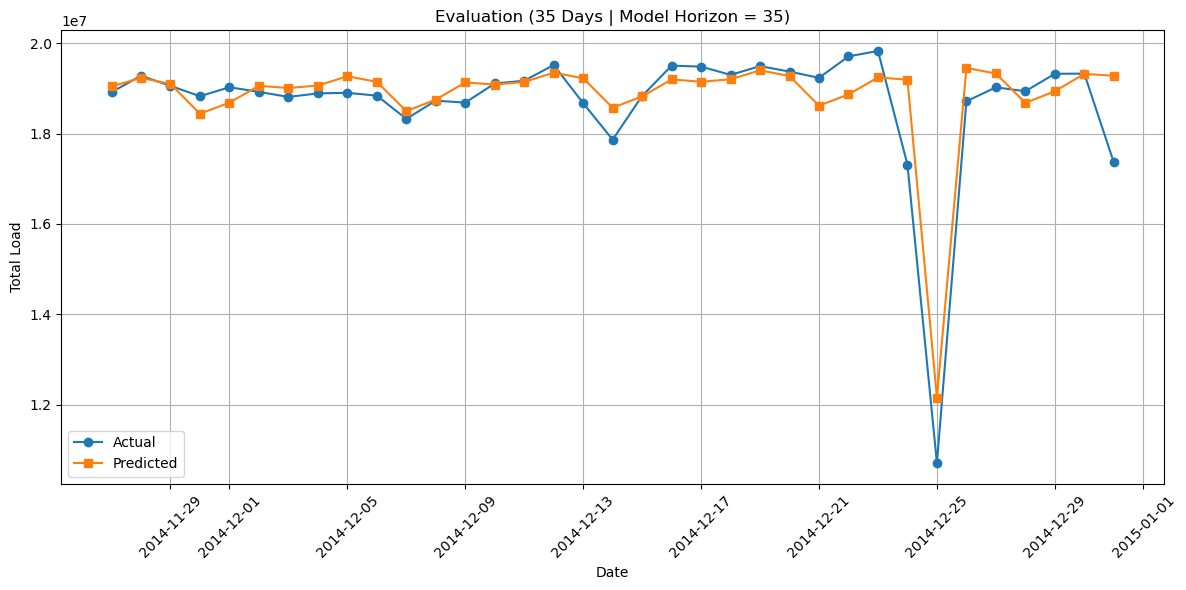

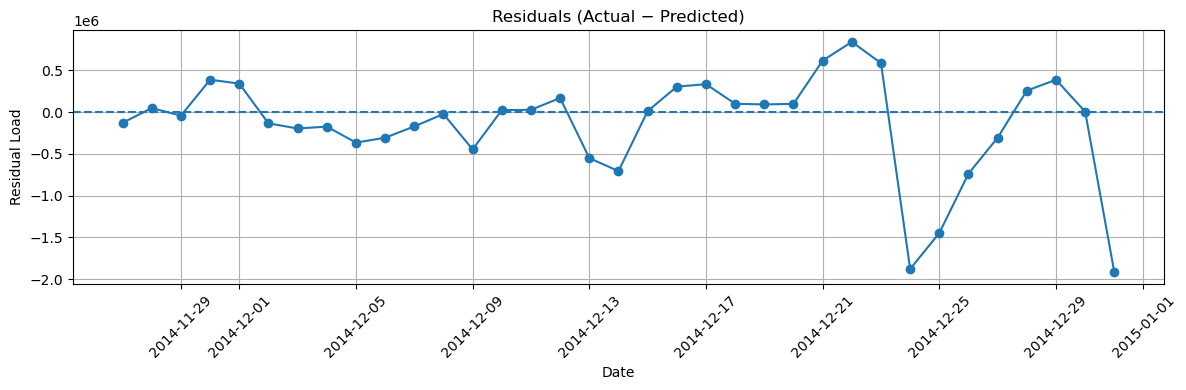

📊 Future forecast saved at: C:\Users\Rohit\OneDrive\Documents\assesment\power_dem_for_model\results\pred\future_prediction_35d.xlsx


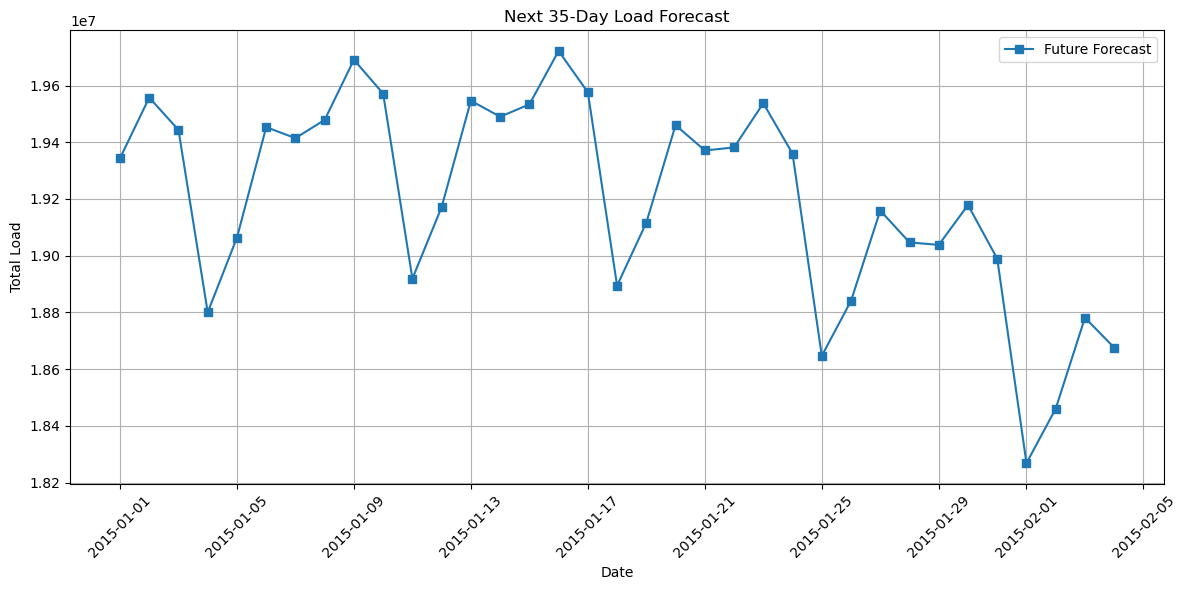

In [ ]:
"""
STEP 3: MODEL TRAINING & FORECASTING
Train SARIMAX and Prophet models using three strategies:
  - ALL_METER: Single model on aggregated demand
  - CATEGORY: Separate models per season category
  - INDIVIDUAL: Models per selected individual meter (if applicable)

Horizons: Number of days ahead to forecast
"""
HORIZONS = [35]  # Set to [30, 60, 90, ...] for multi-horizon analysis

print("🔄 Building models across strategies and horizons...")
final_df = run_strategies(
    df_daily=df_daily_feat,
    meter_summary_df=meter_summary_df,
    season_cols=season_cols,
    horizons=HORIZONS
)

print("✅ Model training completed")
print(f"   • Models trained: {len(final_df)}")
print(f"   • Best Model Summary:\n{final_df.nsmallest(3, 'sMAPE (%)')}")

# ─── Save Evaluation Results ───────────────────────────────────────────────
output_file = save_results(final_df)
print(f"\n✅ Results exported to: {output_file}")

# ─── Generate Predictions & Visualizations ────────────────────────────────
REQUESTED_DAYS = HORIZONS[0]  # Use first horizon for visualization

print(f"\n📊 Generating forecasts for {REQUESTED_DAYS}-day horizon...")
run_prediction_visualization(
    df_daily=df_daily_feat,
    season_cols=season_cols,
    requested_horizon=REQUESTED_DAYS
)

print("\n" + "="*60)
print("✅ PIPELINE COMPLETED SUCCESSFULLY")
print("="*60)

## Pipeline Summary & Next Steps

### Key Variables Available:
| Variable | Type | Description |
|----------|------|-------------|
| `df_daily_feat` | DataFrame | Daily electricity load with temporal features |
| `final_df` | DataFrame | Model evaluation metrics (sMAPE, R², horizon) |
| `season_cols` | List | Season category column names |
| `meter_summary_df` | DataFrame | Per-meter statistics (zeros, activation date) |

### Model Performance:
- **Strategies**: ALL_METER (aggregate), CATEGORY (by season), INDIVIDUAL (per meter)
- **Algorithms**: SARIMAX + Prophet with exogenous regressors
- **Metric**: Symmetric Mean Absolute Percentage Error (sMAPE)

### Output Files:
- `results/model_results/evaluation_metrics_testing.xlsx` – Performance summary with best models per horizon
- `results/Models/` – Serialized models (.joblib format)
- `results/pred/` – Forecast predictions and visualizations

### How to Modify:
1. **Change forecasting horizon** → Edit `HORIZONS = [35]` to `[30, 60, 90, 180]`
2. **Persist processed data** → Set `save=True` in feature_selection cell
3. **Add custom features** → Modify `build_time_features()` in `src/feature_selection.py`